# Churn prediction in Telecom industry

Churn prediction in the telecom industry is the task of identifying customers who are likely to cancel their subscription or discontinue using the telecom services. It is an important problem for telecom companies as customer retention is crucial for their business success.

In the provided code, we use logistic regression, a popular classification algorithm, to build a churn prediction model. Logistic regression is a suitable choice for binary classification problems like churn prediction. It estimates the probability of an instance belonging to a particular class, in this case, whether a customer will churn or not.

# 1. Data Collection

In this churn prediction project in the telecom industry, we collected the dataset from Kaggle. Kaggle is a popular platform for data science and machine learning enthusiasts, providing a vast collection of datasets for various domains.

By accessing Kaggle, we were able to find a suitable dataset related to the telecom industry and customer churn. The dataset contained relevant information about customers, including demographic data, service usage details, and churn status.

# 2. Importing Libraries: 
We started by importing essential libraries such as Pandas, NumPy, Matplotlib, and Seaborn. These libraries provided us with the necessary tools for data manipulation, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\CodeClause internship\Telco Churn prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 3. Loading and Exploring the Dataset: 
We loaded the dataset containing telecom customer information and examined its structure using methods like head(), info(), and describe(). This helped us understand the variables and their data types, as well as get a general overview of the data.

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 4. Handling Null Values and Data Cleaning: 
We checked for null values in the dataset and performed data cleaning. Fortunately, the dataset was free of null values, so no imputation or removal was required.

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 5. Convert categorical variables: 
Categorical variables like 'Churn' (the target variable) are converted into numerical values to facilitate the modeling process. In this case, we map 'Yes' to 1 and 'No' to 0 for the 'Churn' variable.

In [5]:
mapping = {'Yes': 1, 'No': 0}

# Convert 'Yes' and 'No' values to 1 and 0
data = data.replace(mapping)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


# 6. Exploratory Data Analysis (EDA): 
We conducted EDA to gain insights into the relationships between different variables and the churn status. We used various visualizations to compare the distribution of different columns with respect to churn status. This helped us identify potential patterns and correlations.

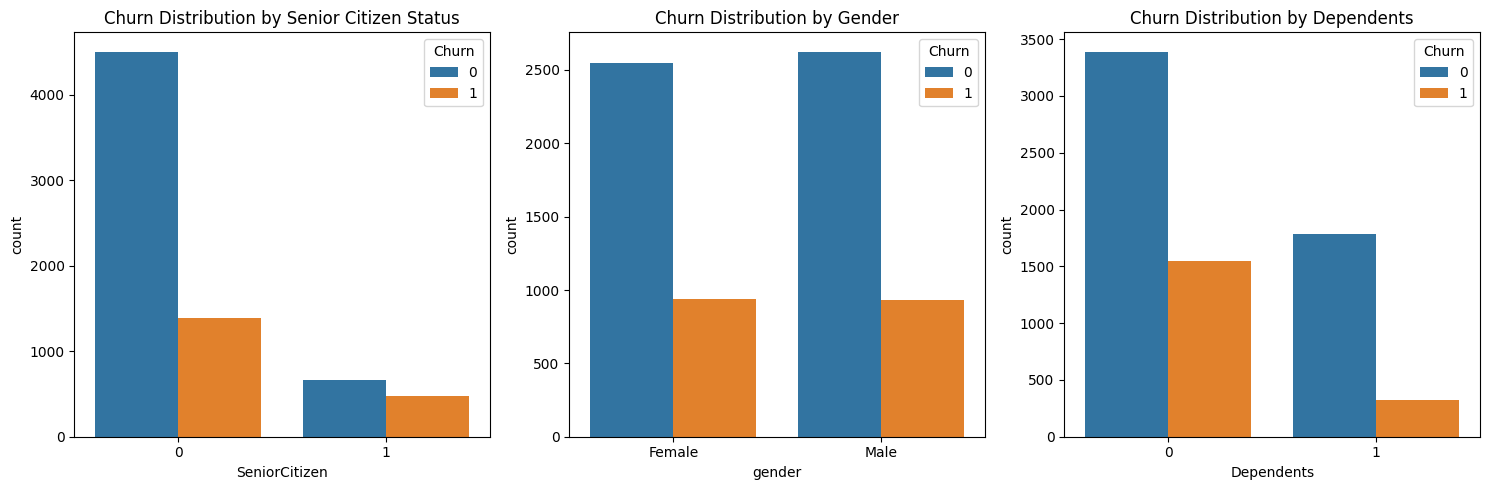

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, ax=axes[0])
axes[0].set_title('Churn Distribution by Senior Citizen Status')

# Plot 2
sns.countplot(x='gender', hue='Churn', data=data, ax=axes[1])
axes[1].set_title('Churn Distribution by Gender')

# Plot 3
sns.countplot(x='Dependents', hue='Churn', data=data, ax=axes[2])
axes[2].set_title('Churn Distribution by Dependents')

plt.tight_layout()
plt.show()


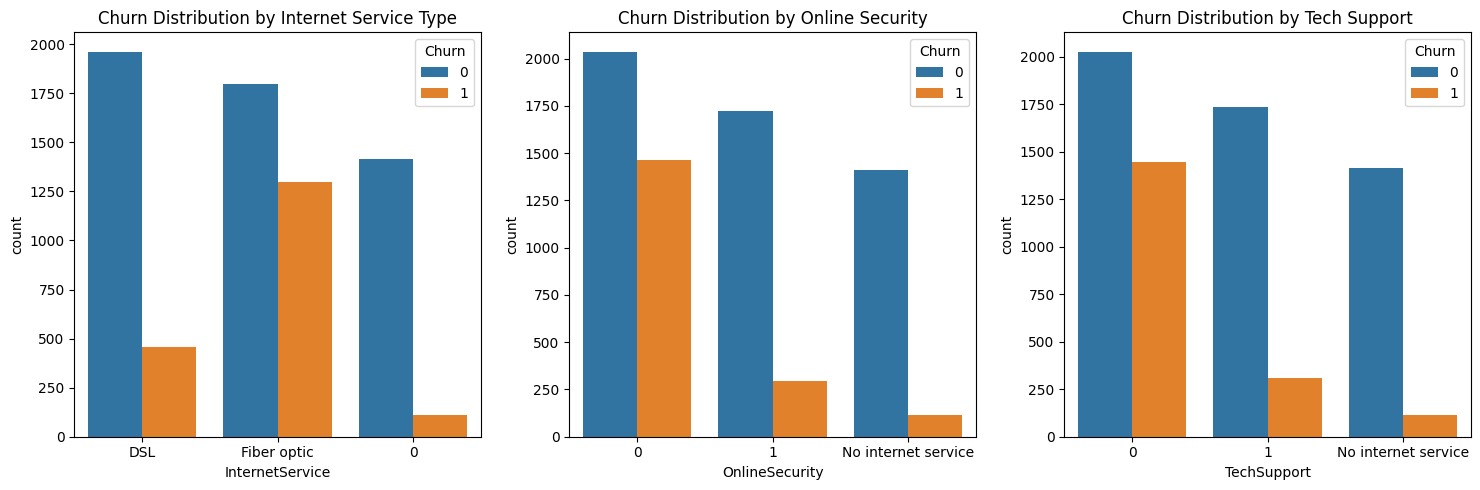

In [7]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 4: Churn Distribution by Internet Service Type
sns.countplot(x='InternetService', hue='Churn', data=data, ax=axs[0])
axs[0].set_title('Churn Distribution by Internet Service Type')

# Plot 5: Churn Distribution by Online Security
sns.countplot(x='OnlineSecurity', hue='Churn', data=data, ax=axs[1])
axs[1].set_title('Churn Distribution by Online Security')

# Plot 6: Churn Distribution by Tech Support
sns.countplot(x='TechSupport', hue='Churn', data=data, ax=axs[2])
axs[2].set_title('Churn Distribution by Tech Support')

plt.tight_layout()
plt.show()


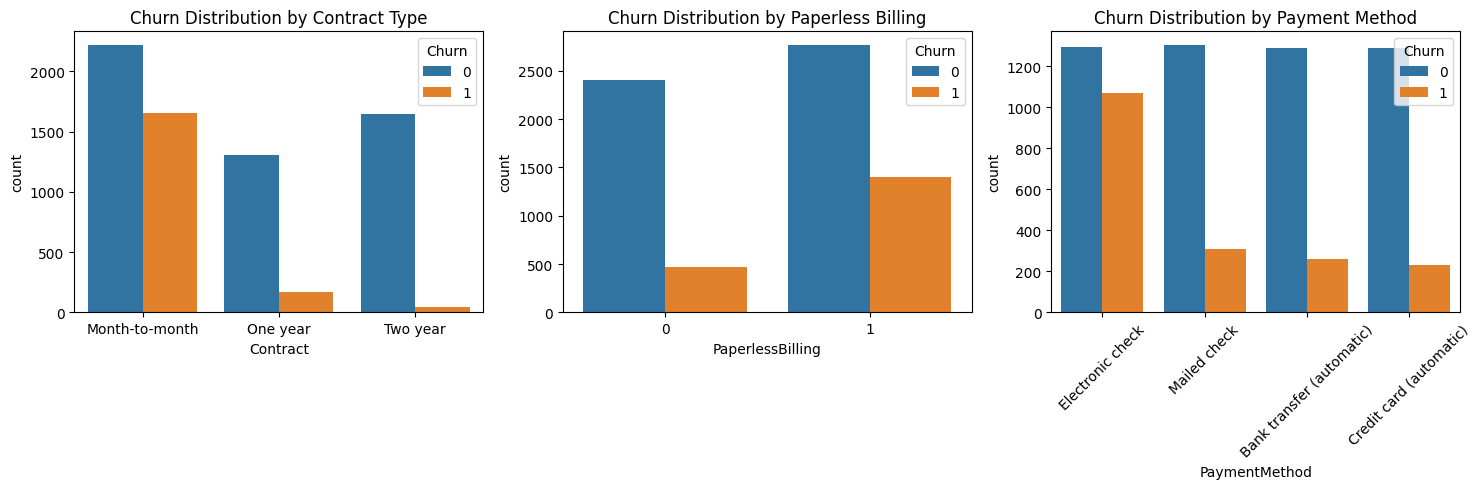

In [8]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 7: Churn Distribution by Contract Type
sns.countplot(x='Contract', hue='Churn', data=data, ax=axs[0])
axs[0].set_title('Churn Distribution by Contract Type')

# Plot 8: Churn Distribution by Paperless Billing
sns.countplot(x='PaperlessBilling', hue='Churn', data=data, ax=axs[1])
axs[1].set_title('Churn Distribution by Paperless Billing')

# Plot 9: Churn Distribution by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=data, ax=axs[2])
axs[2].set_title('Churn Distribution by Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


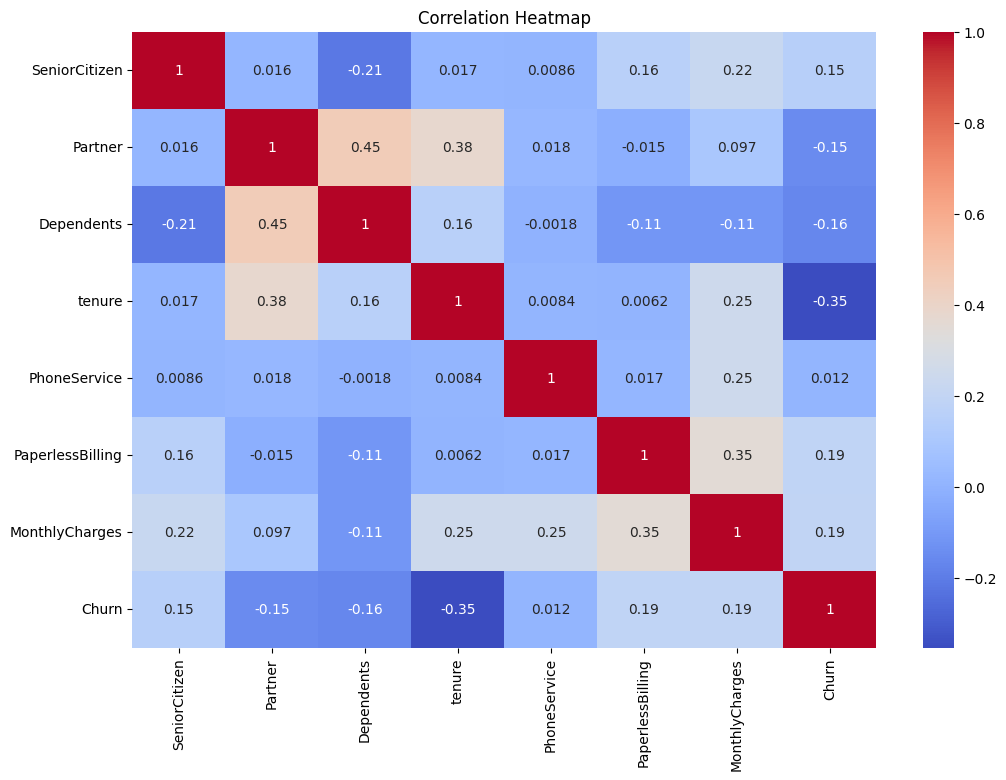

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
data = pd.get_dummies(data, drop_first=True)


# 7. Label Encoding: 
We used label encoding to convert the object variable to numerical representation.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])


# 8. Feature Scaling: 
To ensure that all numerical features were on a similar scale, we applied feature scaling using the StandardScaler. This normalization technique helps in improving the performance of logistic regression.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.select_dtypes(include=['float64']).columns] = scaler.fit_transform(data.select_dtypes(include=['float64']))


# 9. Train-Test Split: 
We split the dataset into training and testing sets using the train_test_split function from Scikit-learn. This allowed us to train the logistic regression model on the training set and evaluate its performance on the unseen testing set.

# 10. Logistic Regression Model: 
We instantiated a logistic regression model using the LogisticRegression class from Scikit-learn and trained it on the training set. Logistic regression is a popular choice for binary classification tasks and is well-suited for predicting churn.

# 11. Model Evaluation: 
Finally, we evaluated the performance of our logistic regression model by predicting churn on the test set and comparing the predictions with the actual churn status. We calculated the accuracy score to measure the model's overall performance in correctly classifying churned and non-churned customers.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8105039034776437
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



The logistic regression model we built for churn prediction in the telecom industry achieved an accuracy of 81.05%. This means that the model correctly predicted the churn status of 81.05% of the customers in the test dataset.

To further evaluate the performance of the model, we analyzed precision, recall, and F1-score for each class (churned vs. non-churned customers).

For the non-churned class (0), the model achieved a precision of 0.85, indicating that out of all the customers predicted as non-churned, 85% were actually non-churned. The recall (also known as sensitivity) for this class was 0.91, meaning that the model correctly identified 91% of the actual non-churned customers. The F1-score, which combines precision and recall, was 0.88.

For the churned class (1), the precision was 0.68, indicating that among the customers predicted as churned, 68% were actually churned. The recall (also known as sensitivity) for this class was 0.54, meaning that the model correctly identified 54% of the actual churned customers. The F1-score for this class was 0.60.

Overall, the weighted average precision, recall, and F1-score were 0.80, 0.81, and 0.80, respectively. These metrics provide a balanced evaluation of the model's performance across both churned and non-churned classes.

In summary, the logistic regression model showed promising results in predicting customer churn in the telecom industry, with an accuracy of 81.05%. However, there is room for improvement, particularly in correctly identifying churned customers (class 1), as the recall and F1-score for this class were relatively lower compared to the non-churned class (class 0). Further optimization and fine-tuning of the model may help improve its performance.